# Курс аналитик данных на Python
## Модуль 7.4 А/Б-тестирование с помощью Python. Критерии и проверки на нормальность 

In [1]:
import pandas as pd #https://pandas.pydata.org/
import numpy as np #https://www.numpy.org/
import scipy as sc #https://www.scipy.org/

import matplotlib.pyplot as plt #https://matplotlib.org/
import seaborn as sns #https://seaborn.pydata.org/
import plotly  # import dash, jupyter_dash #https://plot.ly/

%matplotlib inline 

import warnings
warnings.simplefilter('ignore') #Здесь мы будем игнорировать предупреждения о грядущих изменениях вызовов sc.stats и прочего

**$H_0$** — основная гипотеза,   
**$H_1$** — альтернативная гипотеза.

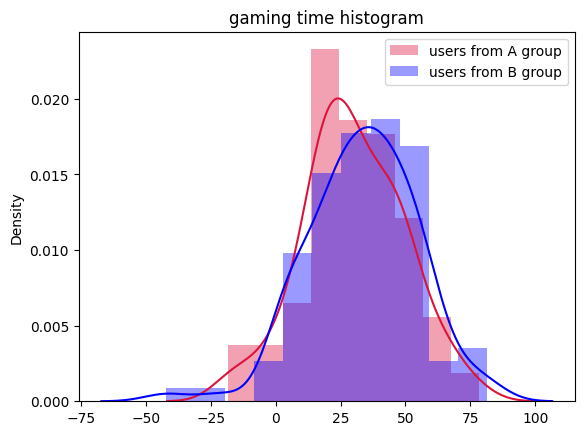

In [2]:
N = 100
X0 = np.random.normal(28, 21, N)
Y0 = np.random.normal(35, 21, N)
sns.distplot(X0, color='crimson', label='users from A group')
sns.distplot(Y0, color='blue', label='users from B group')
plt.title('gaming time histogram')
plt.legend()
plt.show()

`scipy` представляет две проверки на нормальность — это `normaltest` и `shapiro`

In [3]:
sc.stats.normaltest(X0)

NormaltestResult(statistic=0.0782832700877376, pvalue=0.9616145011886237)

In [4]:
sc.stats.normaltest(Y0)

NormaltestResult(statistic=6.325615279037745, pvalue=0.0423067919545078)

`shapiro` более мощный критерий

In [5]:
sc.stats.shapiro(X0)

ShapiroResult(statistic=0.9915810227394104, pvalue=0.790111780166626)

In [6]:
sc.stats.shapiro(Y0)

ShapiroResult(statistic=0.9798407554626465, pvalue=0.12919163703918457)

Mannwhitneyu говорит, что данные достаточно разные

In [7]:
sc.stats.mannwhitneyu(X0, Y0)

MannwhitneyuResult(statistic=4403.0, pvalue=0.1449835223726703)

Использование таких статистических тестов очень просто даёт понять когда $H_0$ нужно отвергнуть, но сложнее даёт понять когда её нужно принять.  
Поэтому нужно проводить такие эксперименты таким образом, чтобы $H_0$ мы могли отвергать.  
Иногда нужно преобразовать данные

---
Односторонний критерий — статистический критерий, учитывающий априорные знания о направлении (увеличении либо уменьшении) значения исследуемого параметра.

In [8]:
sc.stats.mannwhitneyu(X0, Y0, alternative='less') 
# односторонний критерий с параметром less

MannwhitneyuResult(statistic=4403.0, pvalue=0.07249176118633514)

In [9]:
sc.stats.mannwhitneyu(X0, Y0, alternative='greater')  
# односторонний критерий с параметром greater (с неправильным результатом)

MannwhitneyuResult(statistic=4403.0, pvalue=0.9278446369969084)

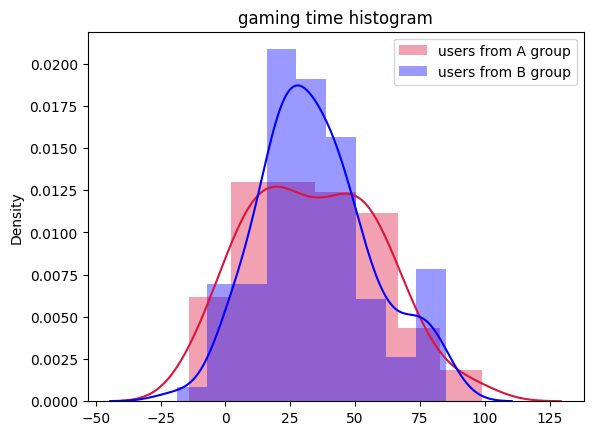

In [22]:
N = 100
X1 = np.random.normal(35, 21, N)
Y1 = np.random.normal(35, 21, N)
sns.distplot(X1, color='crimson', label='users from A group')
sns.distplot(Y1, color='blue', label='users from B group')
plt.title('gaming time histogram')
plt.legend()
plt.show()

In [23]:
sc.stats.mannwhitneyu(X1, Y1)

MannwhitneyuResult(statistic=4910.0, pvalue=0.8268967545989556)

In [24]:
sc.stats.kruskal(X1, Y1)

KruskalResult(statistic=0.048358208955278315, pvalue=0.825945142314269)

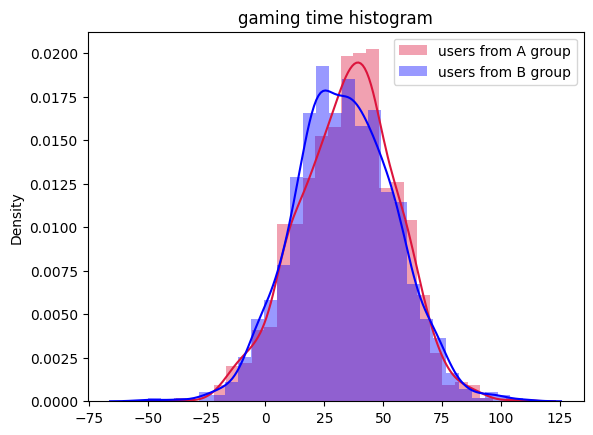

In [25]:
N = 1000
X1 = np.random.normal(35, 21, N)
Y1 = np.random.normal(35, 21, N)
sns.distplot(X1, color='crimson', label='users from A group')
sns.distplot(Y1, color='blue', label='users from B group')
plt.title('gaming time histogram')
plt.legend()
plt.show()

In [26]:
sc.stats.mannwhitneyu(X1, Y1)

MannwhitneyuResult(statistic=522495.0, pvalue=0.08151176253251978)

In [27]:
sc.stats.kruskal(X1, Y1)

KruskalResult(statistic=3.034632833582691, pvalue=0.08150498721516117)

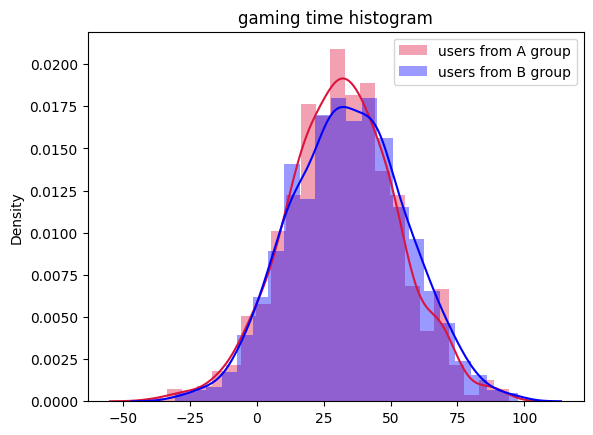

In [28]:
N = 1000
X1 = np.random.normal(33, 21, N)
Y1 = np.random.normal(35, 21, N)
sns.distplot(X1, color='crimson', label='users from A group')
sns.distplot(Y1, color='blue', label='users from B group')
plt.title('gaming time histogram')
plt.legend()
plt.show()

In [29]:
sc.stats.mannwhitneyu(X1, Y1)

MannwhitneyuResult(statistic=469826.0, pvalue=0.019457641621148686)

In [30]:
sc.stats.kruskal(X1, Y1)

KruskalResult(statistic=5.460091610194468, pvalue=0.01945562672363109)

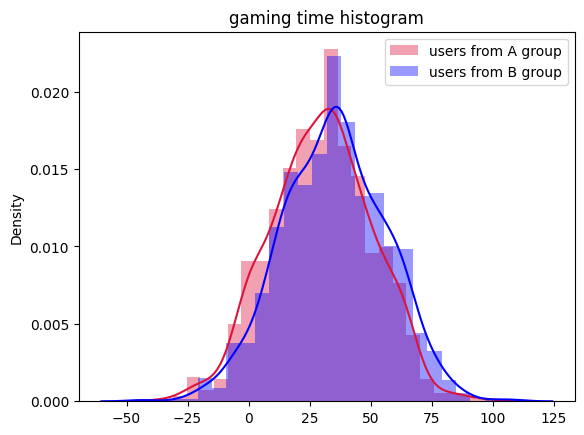

In [31]:
N = 1000
X1 = np.random.normal(30, 21, N)
Y1 = np.random.normal(35, 21, N)
sns.distplot(X1, color='crimson', label='users from A group')
sns.distplot(Y1, color='blue', label='users from B group')
plt.title('gaming time histogram')
plt.legend()
plt.show()

In [32]:
sc.stats.mannwhitneyu(X1, Y1)

MannwhitneyuResult(statistic=432165.0, pvalue=1.4954024835000042e-07)

In [33]:
sc.stats.kruskal(X1, Y1)

KruskalResult(statistic=27.59572548725555, pvalue=1.4950880088364675e-07)

Статистические тесты, доступные в `scipy.stats` (May 2019):  
t-тесты (Стьюдента):  
`ttest_1samp` - для среднего из одной группы;  
`ttest_ind` - для двух независимых выборок;  
`ttest_ind_from_stats` - для двух независимых выборок от их статистик;  
`ttest_rel` - для двух **зависимых** выборок;  

Колмогоров-Смирнов:  
`kstest` - сравнение одной выборки с распределением;  
`ks_2samp` - сравнение двух выборок между собой;  
	
Хи-квадрат:  
`chisquare` - одновыборочный;
	
Манн-Уитни:  
`mannwhitneyu` - двухвыборочный;  
`wilcoxon` - одно/двухвыборочный критерий Вилкоксона, для зависимых выборок;	

Полезные ещё:  
`binom_test` - проверка, что вероятность успеха в серии испытаний равна заданному значению;  
`fligner` - тест на равенство дисперсий (Fligner-Killeen);  
`skewtest` - тест на смещение относительно нормального распределения;  
`kurtosistest` - тест на нормальность коэффициента эксцесса;  
`normaltest` - тест на нормальность распределения;  
`shapiro` - тест Шапиро-Уилка на нормальность.

И много-много других тут: https://docs.scipy.org/doc/scipy/reference/stats.html под тегом Statistical tests.

**На что обращать внимание при дизайне тестов:**  
0.зависимость выборок;  
1.тип данных (это повлияет на распределение итоговое);  
2.максимальный объем выборки;  
3.количество групп выборок;  
4.качество выборок;  
5.репрезентативность выборок;  
6.стратегия рандомизации.

---
Задачи для самостоятельного решения.

Задача 1.  
Детали колёс, изготовленные автоматическим станком, имеют средний диаметр 50 мм. Используя односторонний критерий с α=0,05, проверить эту гипотезу для выборки:  
`X = np.random.normal(50.5, 5, 100)`

In [47]:
X = np.random.normal(50.5, 5, 100)
sc.stats.ttest_1samp(X, 50, alternative='less')

TtestResult(statistic=1.6263690083771898, pvalue=0.946474884734523, df=99)

In [48]:
sc.stats.ttest_1samp(X, 50, alternative='greater')

TtestResult(statistic=1.6263690083771898, pvalue=0.05352511526547705, df=99)

Задача 2.  
Рассматриваем пользоватей какого-либо сервиса. Все они случайно равномерно разделены на две группы, одна видит старый функционал, другая -- новый. Мы видим количество покупок в приложении в зависимости от дня. Задача: построить графики, проверить на нормальность, применить критерии, выяснить, есть ли статистически значимый прирост доходности сервиса.  
Первая часть:  
`X = np.random.normal(10, 10, 100) + np.random.normal(5, 2, 100) + np.random.uniform(5, 10, 100)`  
`Y = np.random.normal(10, 10, 100) + np.random.normal(5, 2, 100) + np.random.uniform(5, 10, 100)`

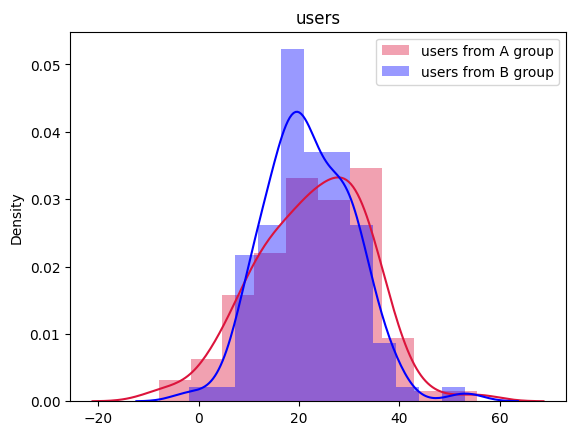

In [49]:
X = np.random.normal(10, 10, 100) + np.random.normal(5, 2, 100) + np.random.uniform(5, 10, 100)
Y = np.random.normal(10, 10, 100) + np.random.normal(5, 2, 100) + np.random.uniform(5, 10, 100)
sns.distplot(X, color='crimson', label='users from A group')
sns.distplot(Y, color='blue', label='users from B group')
plt.title('users')
plt.legend()
plt.show()

In [55]:
sc.stats.normaltest(X), sc.stats.normaltest(Y)

(NormaltestResult(statistic=1.05325286044488, pvalue=0.5905940228333423),
 NormaltestResult(statistic=3.9331232806070684, pvalue=0.1399371843460841))

In [56]:
sc.stats.shapiro(X), sc.stats.shapiro(Y)

(ShapiroResult(statistic=0.9874572157859802, pvalue=0.46908560395240784),
 ShapiroResult(statistic=0.9862642884254456, pvalue=0.390079528093338))

In [57]:
sc.stats.mannwhitneyu(X, Y)

MannwhitneyuResult(statistic=5317.0, pvalue=0.43932557741605893)

In [58]:
sc.stats.kruskal(X, Y)

KruskalResult(statistic=0.5999343283581311, pvalue=0.4386030838836681)

Вторая часть:  
`X = np.random.normal(10, 10, 100) + np.random.normal(5, 2, 100) + np.random.uniform(5, 10, 100)`  
`Y = np.random.normal(15, 15, 100) + np.random.normal(8, 4, 100) + np.random.uniform(2, 13, 100)`

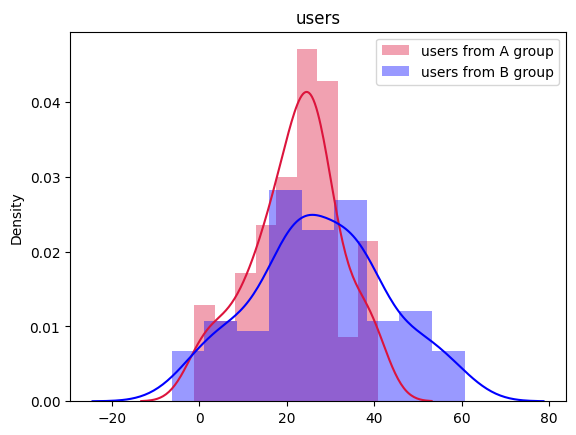

In [60]:
X = np.random.normal(10, 10, 100) + np.random.normal(5, 2, 100) + np.random.uniform(5, 10, 100)
Y = np.random.normal(15, 15, 100) + np.random.normal(8, 4, 100) + np.random.uniform(2, 13, 100)
sns.distplot(X, color='crimson', label='users from A group')
sns.distplot(Y, color='blue', label='users from B group')
plt.title('users')
plt.legend()
plt.show()

In [61]:
sc.stats.normaltest(X), sc.stats.normaltest(Y)

(NormaltestResult(statistic=2.0888682912307606, pvalue=0.3518908820510286),
 NormaltestResult(statistic=0.7372976345215737, pvalue=0.6916682697614152))

In [62]:
sc.stats.shapiro(X), sc.stats.shapiro(Y)

(ShapiroResult(statistic=0.9743139147758484, pvalue=0.0476875826716423),
 ShapiroResult(statistic=0.9884780049324036, pvalue=0.5440905094146729))

In [63]:
sc.stats.mannwhitneyu(X, Y)

MannwhitneyuResult(statistic=3870.0, pvalue=0.005783538551978308)

In [64]:
sc.stats.kruskal(X, Y)

KruskalResult(statistic=7.623283582089584, pvalue=0.005761948174876478)